## Source
1. https://github.com/gdmarmerola/interactive-intro-rl/blob/master/notebooks/ts_for_multi_armed_bandit.ipynb

In [1]:
# importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta as beta_dist
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm import tqdm

# turning off automatic plot showing, and setting style
plt.ioff()
plt.style.use('fivethirtyeight')

In [2]:
class MAB:
    def __init__(self, bandit_probs):
        self.bandit_probs = bandit_probs
        self.max_reward = np.max(self.bandit_probs)
    def draw(self, k):
        reward = np.random.binomial(1, self.bandit_probs[k])
        regret =  self.max_reward - self.bandit_probs[k]
        return reward, regret

In [3]:
bandit_probs = [0.35, 0.40, 0.30, 0.25]

In [4]:
mab = MAB(bandit_probs)

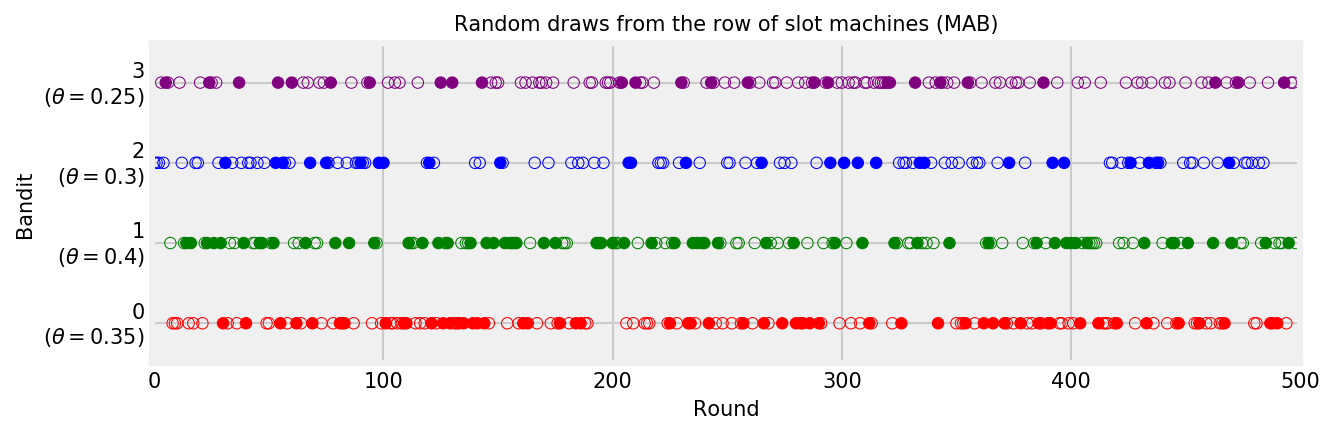

In [5]:
N_DRAWS = 500
N_BANDITS = len(mab.bandit_probs)
k_array = np.zeros((N_BANDITS,N_DRAWS))
reward_array = np.zeros((N_BANDITS,N_DRAWS))

# lists for ease of use, visualization
k_list = []
reward_list = []
# opening figure and setting style
fig, ax = plt.subplots(figsize=(9, 3), dpi=150)
ax.set(xlim=(-1, N_DRAWS), ylim=(-0.5, N_BANDITS-0.5))
# colors for each bandit
bandit_colors = ['red', 'green', 'blue', 'purple']

for draw_number in range(N_DRAWS):
    # choosing arm and drawing
    k = np.random.choice(range(N_BANDITS),1)[0]
    reward, regret = mab.draw(k)
#     print(k, "-", reward, "-", regret)
    k_list.append(k)
    reward_list.append(reward)
    k_array[k, draw_number] = 1
    reward_array[k, draw_number] = reward
    
    # getting list of colors that tells us the bandit
    color_list = [bandit_colors[k] for k in k_list]
    
     # getting list of facecolors that tells us the reward
    facecolor_list = [['none', bandit_colors[k_list[i]]][r] for i, r in enumerate(reward_list)]    

    # initializing with first data
scatter = ax.scatter(y=[k_list[0]], x=[list(range(N_DRAWS))[0]], color=[color_list[0]], linestyle='-', marker='o', s=30, facecolor=[facecolor_list[0]]);

# titles
plt.title('Random draws from the row of slot machines (MAB)', fontsize=10)
plt.xlabel('Round', fontsize=10); plt.ylabel('Bandit', fontsize=10);
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(['{}\n($\\theta = {}$)'.format(i, bandit_probs[i]) for i in range(4)])
ax.tick_params(labelsize=10)
fig.tight_layout()

# function for updating
def animate(i):
    x = list(range(N_DRAWS))[:i]
    y = k_list[:i]
    scatter.set_offsets(np.c_[x, y])
    scatter.set_color(color_list[:i])
    scatter.set_facecolor(facecolor_list[:i])
    ax.set_yticks([0,1,2,3])
    ax.set_yticklabels(['{}\n($\\theta = {}$)'.format(i, bandit_probs[i]) for i in range(4)])
    ax.tick_params(labelsize=10)
    return (scatter,)

# function for creating animation
anim = FuncAnimation(fig, animate, frames=N_DRAWS, interval=25, blit=True)

# showing
HTML(anim.to_html5_video())